In [14]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [16]:
MQ131_RL= 10
MQ131_VIN = 5
MQ131_RO = 5


In [119]:
#load
df=pd.read_csv('DATA_raw.TXT',names=['year','month','day','hour','minute','second','hum','temp','pr','l','co','so2','no2','o3','pm10','pm25','void'])

df.head()

#Dates to datetime
dates=df[['year','month','day','hour','minute','second']]
dates['year']=dates['year'].add(2000)
dates['minute']=dates['minute'].add(60)
df['datetime']=pd.to_datetime(dates)

#discard non useful data
df=df[['datetime','o3','temp']]

# #Operaciones del datasheet
df['rs']=((MQ131_VIN/df['o3'])/df['o3'])*MQ131_RL;
df['rs_ro'] = df['rs']/MQ131_RO;
df['rs_ro_abs']=abs(df['rs_ro'])
#df['o3_final'] = (11.434*df['rs_ro_abs'])**2.1249;



# #agregation
# df=df.groupby(pd.Grouper(key='datetime',freq='1800s',axis=1)).mean()
# # save
# df.to_csv('arduair_o3_promedio_hora.csv')
# # reset index
# df=df.reset_index()


/home/fabian/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


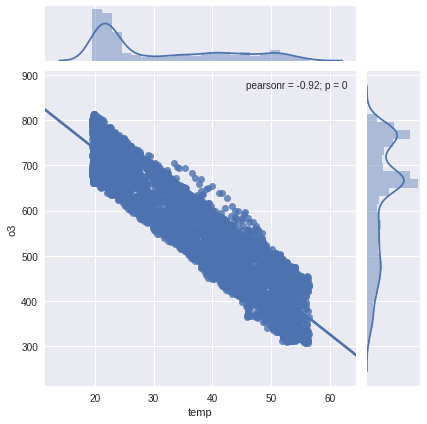

In [104]:
sns.jointplot(data=df,x='temp',y='o3', kind='reg')

# Conclusiones parciales

Llegados a este punto podemos concluir que la temperatura afecta de una tan fuerte, que distorsiona completamente la lectura de ozono

## que pasa si... ¿Usamos la desviacion con respecto a la temperatura para hallar el ozono? funcionara?

Para ello debo calibrar O3 como si fuera temperatura

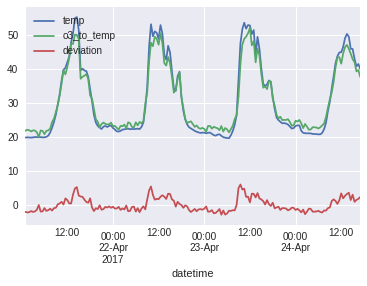

In [124]:
def calibrate(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return x*m+b
dfcrazy=df[['datetime','temp']]
dfcrazy['o3_to_temp']=calibrate(df['o3'],df['temp'])
dfcrazy['deviation']=-dfcrazy['o3_to_temp']+dfcrazy['temp']

dfcrazy=dfcrazy.groupby(pd.Grouper(key='datetime',freq='1800s',axis=1)).mean()
dfcrazy.plot()